hi 76
21


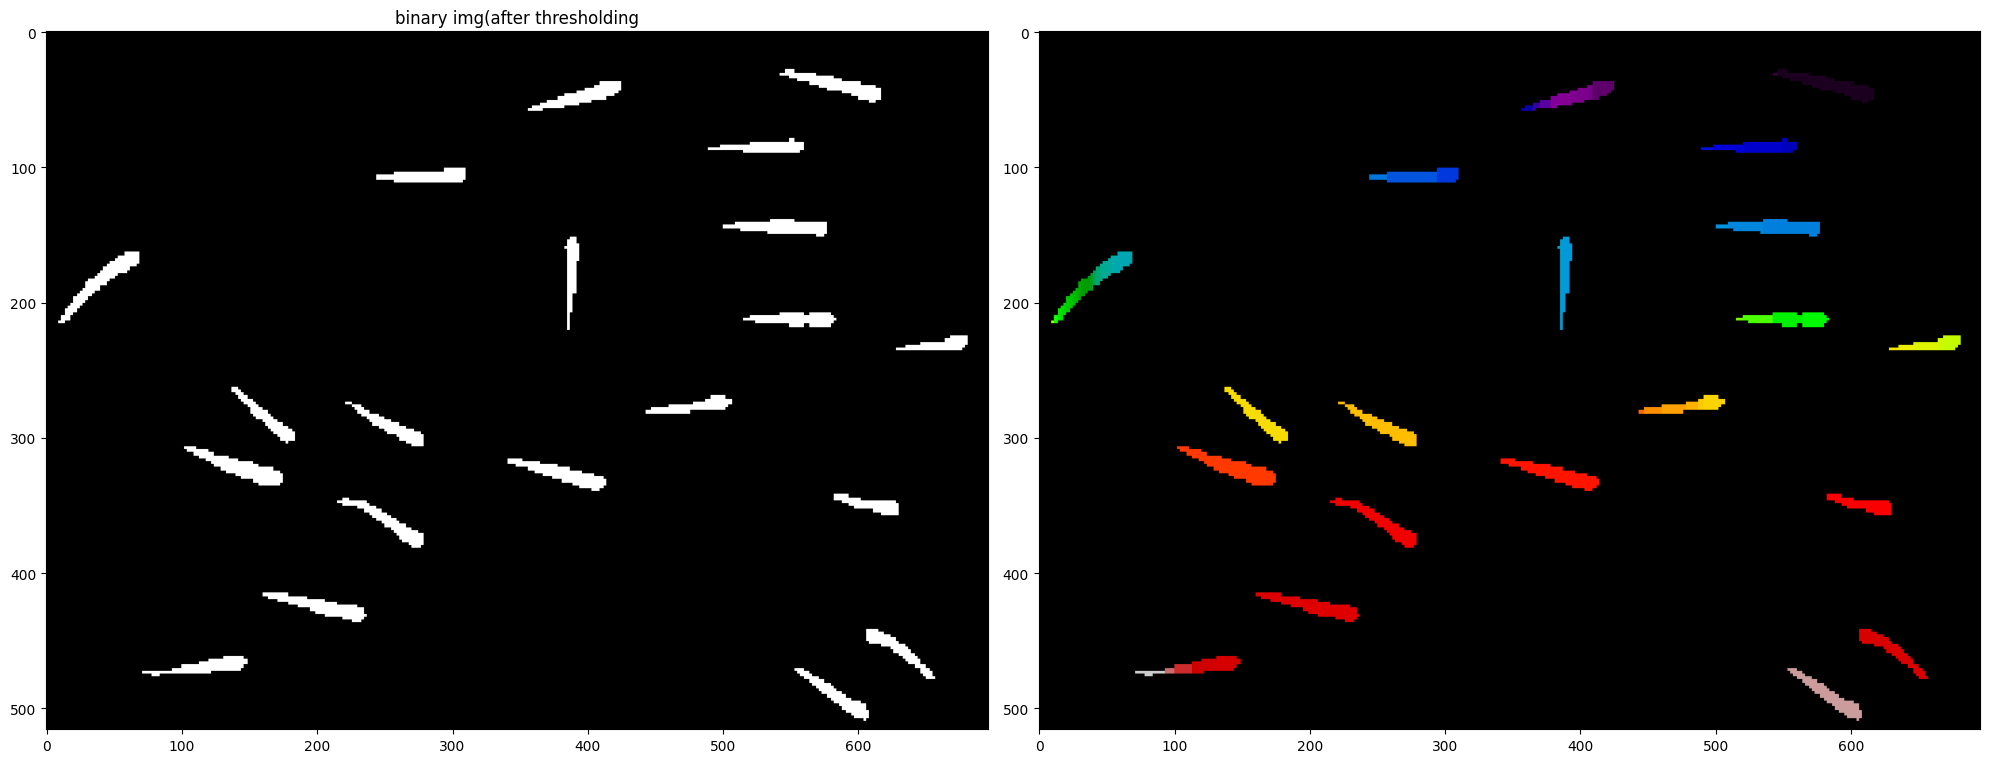

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("fish.png", cv2.IMREAD_GRAYSCALE)


t, bin_img = cv2.threshold(img, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
bin_img -= 1

count = 0
labels_img = np.zeros_like(bin_img, dtype=np.uint32)

neighbors = [(0, 1), (1, 0), (-1, 0), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)]
for i in range(1, labels_img.shape[0]-1):
    for j in range(1, labels_img.shape[1]-1):
        if bin_img[i, j] == 0:
            continue

        new_label = True
        for v in neighbors:
            if bin_img[i + v[0], j+v[1]] == 0:
                continue
            l = labels_img[i + v[0], j+v[1]]
            if l != 0:
                labels_img[i, j] = l
                new_label = False
                break
        if new_label:
            count += 1
            labels_img[i, j] = count

print("hi", count)
ls, lm = cv2.connectedComponents(bin_img)
print(ls)


plt.figure("lab 6", (20, 15))

plt.subplot(1, 2, 1)
plt.imshow(bin_img, cmap='gray')
plt.title("binary img(after thresholding")


plt.subplot(1, 2, 2)
plt.imshow(labels_img, cmap='nipy_spectral')
plt.tight_layout()

